In [1]:
import csv

In [2]:
import numpy as np
from scipy.spatial import distance

In [3]:
dist         = []
uqResults    = []
datasetsList = []

In [4]:
rowNumber = 0
with open('dist_data/hurley_feb23_dist_crab_th03.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        if rowNumber >= 1:
            distriTemp = []
            #print(row[0])
            x = row[0].split(",")
            for i in range(len(x)-2):
                distriTemp.append(float(x[i]))
            uqResults.append(float(x[-2]))
            dist.append(distriTemp)
            datasetsList.append(x[-1])
        rowNumber += 1

In [5]:
jsdResults  = []
jsdIdxDict  = {}
uqIdxDict   = {}
nameIdxDict = {}
presDict    = {}

baseDist = dist[0]
baselineScanIdx = 82

for i in range(len(dist)):
    resultTmp = distance.jensenshannon(np.array(baseDist), np.array(dist[i]))
    jsdResults.append(resultTmp)
    if resultTmp == 0:
        tmpIdx = baselineScanIdx
    else: 
        tmpIdx = int(datasetsList[i].split(".")[0].split("_")[-1])
    jsdIdxDict[tmpIdx]  = resultTmp
    uqIdxDict[tmpIdx]   = uqResults[i]
    nameIdxDict[tmpIdx] = datasetsList[i]
    # need to obtain the pressure info:
    presDict[tmpIdx] = -10 # this is the adhoc for N.A. pressure
    for tmpStr in datasetsList[i].split("_"):
#         if 'mpa' in tmpStr.lower():
#             presDict[tmpIdx] = int(tmpStr[0:-3])
#             break
        if tmpStr.lower()[-1] == 'n':
            presDict[tmpIdx] = int(tmpStr[0:-1])
            break

In [6]:
presDict

{82: -10,
 83: -10,
 84: -10,
 85: -10,
 86: -10,
 90: 10,
 91: 10,
 92: 10,
 93: 10,
 97: 20,
 89: 10,
 98: 20,
 99: 20,
 100: 20,
 96: 20,
 104: 30,
 105: 30,
 107: 30,
 103: 30,
 111: 40,
 106: 30,
 112: 40,
 113: 40,
 118: 50,
 110: 40,
 114: 40,
 119: 50,
 120: 50,
 121: 50,
 125: 70,
 117: 50,
 126: 70,
 127: 70,
 128: 70,
 132: 90,
 124: 70,
 133: 90,
 134: 90,
 135: 90,
 131: 90}

In [7]:
for key in presDict:
    if presDict[key] == -10:
        presDict[key] = 0

In [8]:
presDict

{82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 90: 10,
 91: 10,
 92: 10,
 93: 10,
 97: 20,
 89: 10,
 98: 20,
 99: 20,
 100: 20,
 96: 20,
 104: 30,
 105: 30,
 107: 30,
 103: 30,
 111: 40,
 106: 30,
 112: 40,
 113: 40,
 118: 50,
 110: 40,
 114: 40,
 119: 50,
 120: 50,
 121: 50,
 125: 70,
 117: 50,
 126: 70,
 127: 70,
 128: 70,
 132: 90,
 124: 70,
 133: 90,
 134: 90,
 135: 90,
 131: 90}

In [9]:
sortedJSD  = []
sortedIdx  = []
sortedName = []
sortedUQ   = []
sortedPres = []

for key in sorted(jsdIdxDict):
    sortedIdx.append(key)
    sortedJSD.append(jsdIdxDict[key])
    sortedUQ.append(uqIdxDict[key])
    sortedName.append(nameIdxDict[key])
    sortedPres.append(presDict[key])

In [10]:
sortedPres

[0,
 0,
 0,
 0,
 0,
 10,
 10,
 10,
 10,
 10,
 20,
 20,
 20,
 20,
 20,
 30,
 30,
 30,
 30,
 30,
 40,
 40,
 40,
 40,
 40,
 50,
 50,
 50,
 50,
 50,
 70,
 70,
 70,
 70,
 70,
 90,
 90,
 90,
 90,
 90]

In [11]:
import matplotlib.pyplot as plt

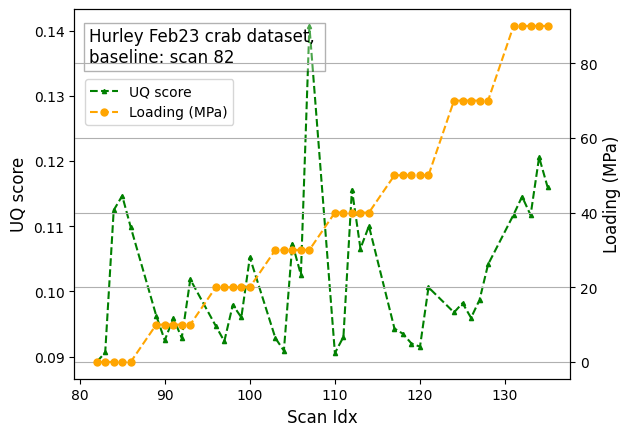

In [14]:
fig = plt.figure()

# plt.plot(sortedIdx, sortedJSD, c="green", label="JSD score")

ax1 = plt.subplot()
# l1, = ax1.plot(sortedIdx, sortedJSD, c="green", marker='o', markersize=3, linestyle='--', label="JSD score")
# ax2 = ax1.twinx()
l2, = ax1.plot(sortedIdx, sortedUQ, c="green", marker='^', markersize=3, linestyle='--', label="UQ score")

ax3 = ax1.twinx()
# ax3.spines.right.set_position(("axes", 1.2))

l3, = ax3.plot(sortedIdx, sortedPres, c="orange", marker='o', markersize=5, linestyle='--', label="Loading (MPa)")



ax1.set_xlabel("Scan Idx", fontsize=12)
# ax1.set_ylim(0, 0.7)
# ax2.set_ylim(0, 0.7)
#ax1.set_ylim(0.3, 0.35)
# ax2.set_ylim(0.3, 0.35)
# ax1.set_ylabel("JSD score", fontsize=12)
ax1.set_ylabel("UQ score", fontsize=12)
ax3.set_ylabel("Loading (MPa)", fontsize=12)


# plt.legend([l2], ["UQ score"])


textstr = f'Hurley Feb23 crab dataset, \nbaseline: scan {baselineScanIdx}'

props = dict(boxstyle='square', facecolor='white', alpha=0.3)

# place a text box in upper left in axes coords
ax1.text(0.03, 0.95, textstr, transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# plt.legend([l1, l2, l3], ["JSD score", "UQ score", "Pressure"], loc='center right')
plt.legend([l2, l3], ["UQ score", "Loading (MPa)"], loc='best', bbox_to_anchor=(0.335, 0.83))
#plt.legend(loc='center right')
plt.grid()

plt.savefig('results_figure/hurley23_crab_dataset_th03.pdf', format='pdf', bbox_inches ="tight",
            pad_inches = 1)

plt.show()

In [ ]:
i = 0

with open('jsd_results/jsd4hurleyfeb23dataset_th03.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for key in sortedIdx:
        tmpRow = []
        tmpRow.append(sortedName[i])
        tmpRow.append(sortedJSD[i])
        tmpRow.append(sortedUQ[i])
        i += 1
        writer.writerow(tmpRow)

In [ ]:
# create 10 bins of JSD scores: [0, 0.1), [0.2, 0.3) ...

binJSDs = []

for i in range(10):
    binJSDs.append([])

i = 0

for result in jsdResults:
    idx = int(result/0.1)
    print(f"{result} at bin {idx}")
    tmpRow = [datasetsList[i], result]
    i += 1
    binJSDs[idx].append(tmpRow)

In [ ]:
binJSDs[5]